In [1]:
import torch
import torchvision.transforms.functional as TF
from torchmetrics import MultiScaleStructuralSimilarityIndexMeasure

import os
from PIL import Image
import matplotlib.pyplot as plt

from mae import mae_vit_large_patch16

img_size = 224
patch_size = 16
category = "zipper"
mask_ratio = 0.25
device = torch.device("cuda")
msssim = MultiScaleStructuralSimilarityIndexMeasure()

/home/yiming/mambaforge/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


MS-SSIM: 0.7991129755973816


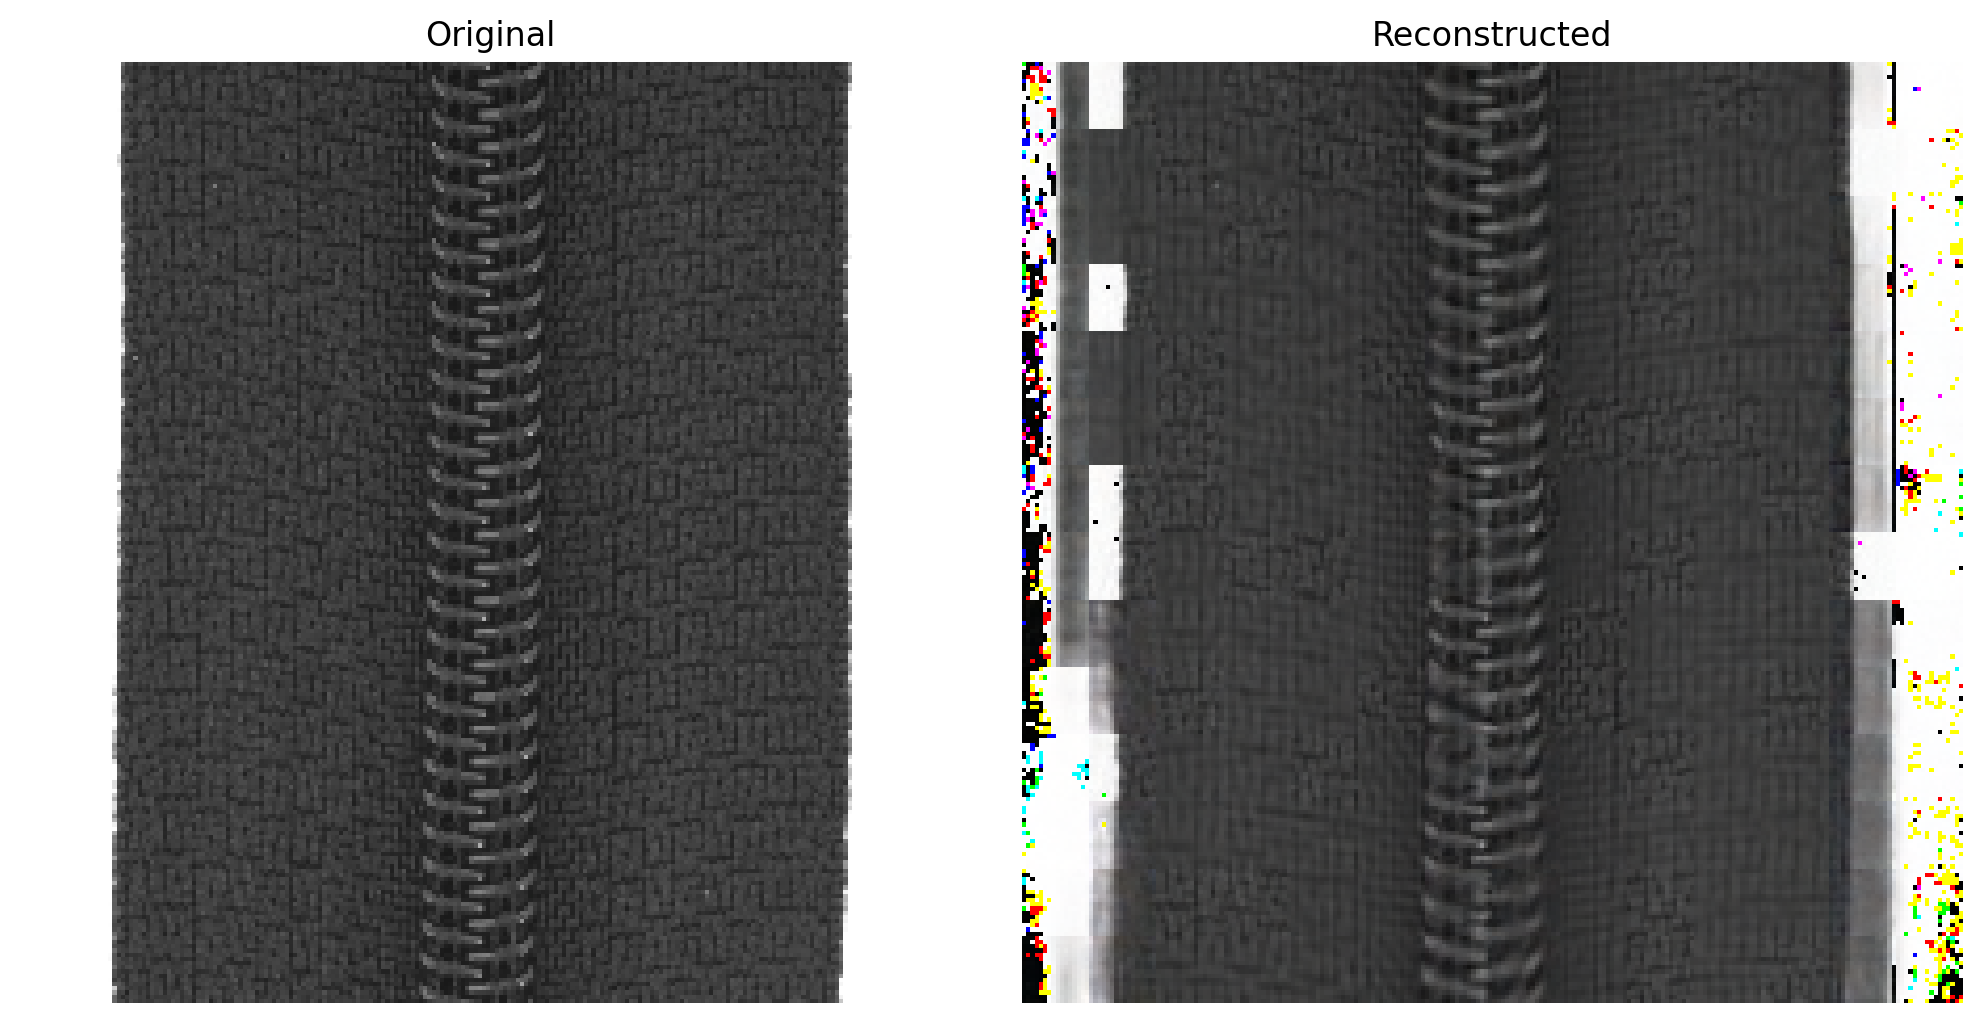

In [2]:
img_path = os.path.join("data", category, "test", "good", "000.png")
with Image.open(img_path, "r") as img:
    img = img.convert("RGB")

img_tensor = TF.to_tensor(img)
img_tensor = TF.resize(img_tensor, (img_size, img_size))
img_tensor = TF.normalize(img_tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
img_tensor = img_tensor.unsqueeze(0).to(device)

model = mae_vit_large_patch16(img_size=224)
model.to(device)
# ckpt_path = os.path.join("checkpoints", "mae_base", category, "checkpoint.pth")
# model.load_state_dict(torch.load(ckpt_path, map_location=device)["model"])
ckpt_path = os.path.join("checkpoints", "mae_pretrained", category, "best_auc_roc.pth")
model.load_state_dict(torch.load(ckpt_path, map_location=device))
model.eval()
with torch.no_grad():
    recon, orig = model(img_tensor)
recon = recon.cpu()
orig = orig.cpu()

# recon = rearrange(recon.cpu(), "(h w) c ph pw -> c (h ph) (w pw)", h=img_size // patch_size, w=img_size // patch_size)
# orig = rearrange(orig.cpu(), "(h w) c ph pw -> c (h ph) (w pw)", h=img_size // patch_size, w=img_size // patch_size)

print(f"MS-SSIM: {msssim(recon, orig)}")
recon = recon.squeeze(0)
orig = orig.squeeze(0)
recon = TF.normalize(recon, mean=[0., 0., 0.], std=[1. / 0.229, 1. / 0.224, 1. / 0.225])
recon = TF.normalize(recon, mean=[-0.485, -0.456, -0.406], std=[1., 1., 1.])
recon = TF.to_pil_image(recon)

orig = TF.normalize(orig, mean=[0., 0., 0.], std=[1. / 0.229, 1. / 0.224, 1. / 0.225])
orig = TF.normalize(orig, mean=[-0.485, -0.456, -0.406], std=[1., 1., 1.])
orig = TF.to_pil_image(orig)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=200, constrained_layout=True)
ax[0].imshow(orig)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(recon)
ax[1].set_title("Reconstructed")
ax[1].axis("off")
plt.show()

MS-SSIM: 0.7533136010169983


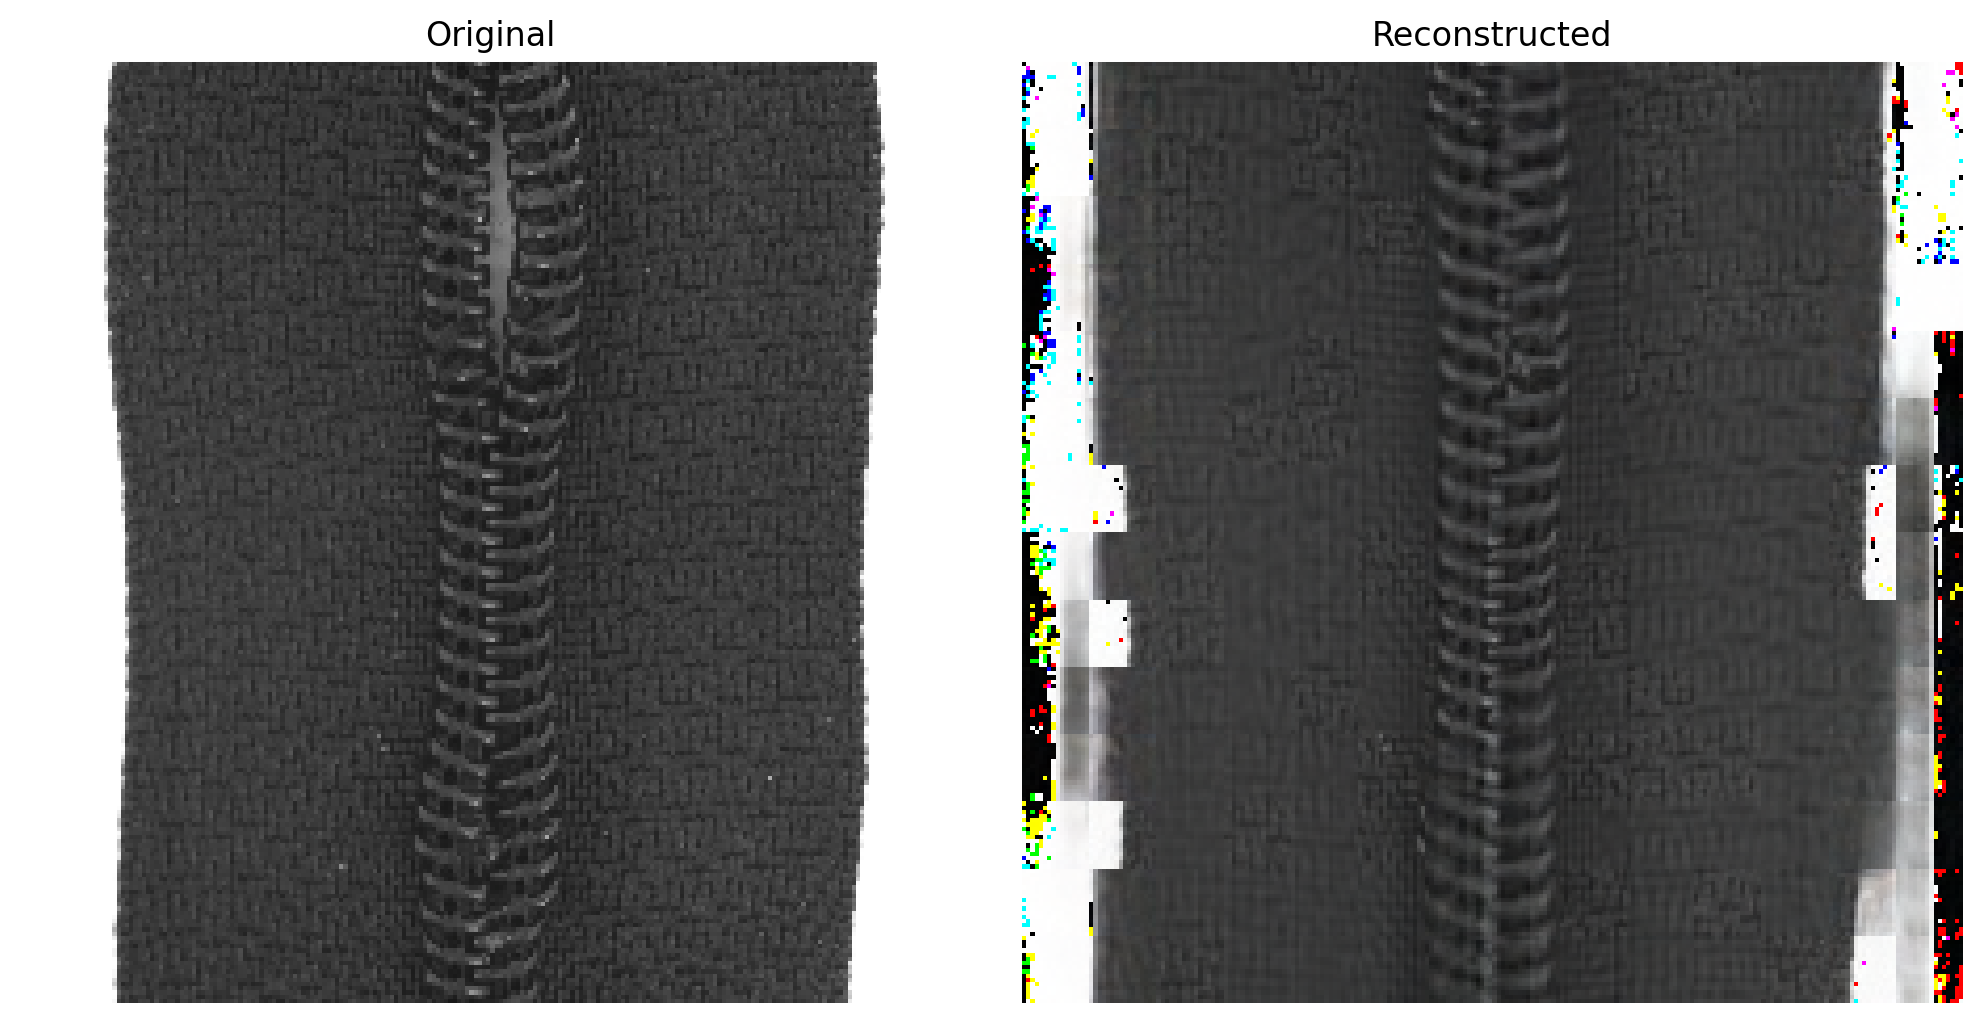

In [3]:
img_path = os.path.join("data", category, "test", "combined", "000.png")
with Image.open(img_path, "r") as img:
    img = img.convert("RGB")

img_tensor = TF.to_tensor(img)
img_tensor = TF.resize(img_tensor, (img_size, img_size))
img_tensor = TF.normalize(img_tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
img_tensor = img_tensor.unsqueeze(0).to(device)

model = mae_vit_large_patch16(img_size=224)
model.to(device)
# ckpt_path = os.path.join("checkpoints", "mae_base", category, "checkpoint.pth")
# model.load_state_dict(torch.load(ckpt_path, map_location=device)["model"])
ckpt_path = os.path.join("checkpoints", "mae_pretrained", category, "best_auc_roc.pth")
model.load_state_dict(torch.load(ckpt_path, map_location=device))
model.eval()
with torch.no_grad():
    recon, orig = model(img_tensor)
recon = recon.cpu()
orig = orig.cpu()

# recon = rearrange(recon.cpu(), "(h w) c ph pw -> c (h ph) (w pw)", h=img_size // patch_size, w=img_size // patch_size)
# orig = rearrange(orig.cpu(), "(h w) c ph pw -> c (h ph) (w pw)", h=img_size // patch_size, w=img_size // patch_size)

print(f"MS-SSIM: {msssim(recon, orig)}")
recon = recon.squeeze(0)
orig = orig.squeeze(0)
recon = TF.normalize(recon, mean=[0., 0., 0.], std=[1. / 0.229, 1. / 0.224, 1. / 0.225])
recon = TF.normalize(recon, mean=[-0.485, -0.456, -0.406], std=[1., 1., 1.])
recon = TF.to_pil_image(recon)

orig = TF.normalize(orig, mean=[0., 0., 0.], std=[1. / 0.229, 1. / 0.224, 1. / 0.225])
orig = TF.normalize(orig, mean=[-0.485, -0.456, -0.406], std=[1., 1., 1.])
orig = TF.to_pil_image(orig)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=200, constrained_layout=True)
ax[0].imshow(orig)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(recon)
ax[1].set_title("Reconstructed")
ax[1].axis("off")
plt.show()